In [45]:
#CONTENTS LIST:
#1. Data Cleaning

#2. Explore data visually (looking for variables to test)

#3. Hypothesis

#4. Reshape the variables into NumPy arrays

#5. Split the data into two sets: a training set and a test set

#6. Run a linear regression on the data
#   First, fit the model you created to the training set.
#   Then, create a prediction for y on the test set.

#7. Create a plot that shows the regression line on the test set.

#8. Interpretation of how well the line appears to fit the data.

#9. Check the model performance statistics—MSE and R2 score.

#10. Compare the predicted y values with the actual y values in a dataframe.

#11. Include your thoughts on how well the model performed on the test set in a markdown cell.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path=r"C:\Users\HP\03-2024 Gun Violence"

In [4]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Importing of Project 6 Data Gender Grouped.csv from gender grouping completed in excel.
"""

gun_vio =pd.read_csv(os.path.join(path,"02 Data","Prepared Data","Project_6_Data_Gender_Grouped.csv"),index_col= False)

In [5]:
gun_vio.head()

,incident_id,date,state,city_or_county,address_of_incident,count_killed,count_of_injured,congressional_district,gun_stolen,gun_type,...,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_involvement,state_house_district,state_senate_district,Male Participants,Female Participants
0,461105,1/1/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14,NaN,NaN,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,3,1
1,460726,1/1/2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,43,NaN,NaN,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1,0
2,478855,1/1/2013,Ohio,Lorain,1776 East 28th Street,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,5,0
3,478925,1/5/2013,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6,NaN,NaN,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,3,1
4,478959,1/7/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,2,2


In [6]:
gun_vio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227733 entries, 0 to 227732
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   incident_id               227733 non-null  int64  
 1   date                      227733 non-null  object 
 2   state                     227733 non-null  object 
 3   city_or_county            227733 non-null  object 
 4   address_of_incident       211686 non-null  object 
 5   count_killed              227733 non-null  int64  
 6   count_of_injured          227733 non-null  int64  
 7   congressional_district    227733 non-null  int64  
 8   gun_stolen                128283 non-null  object 
 9   gun_type                  128301 non-null  object 
 10  incident_details          227411 non-null  object 
 11  latitude                  227723 non-null  float64
 12  location_description      39581 non-null   object 
 13  longitude                 227723 non-null  f

In [7]:
# Create a data frame with just the columns needed
gun_vio_regress = gun_vio[['incident_id','count_killed', 'congressional_district','state', 'longitude', 'latitude', 'Male Participants', 'Female Participants']]

In [8]:
gun_vio_regress.head()

,incident_id,count_killed,congressional_district,state,longitude,latitude,Male Participants,Female Participants
0,461105,0,14,Pennsylvania,-79.8559,40.3467,3,1
1,460726,1,43,California,-118.3330,33.9090,1,0
2,478855,1,9,Ohio,-82.1377,41.4455,5,0
3,478925,4,6,Colorado,-104.8020,39.6518,3,1
4,478959,2,6,North Carolina,-79.9569,36.1140,2,2


In [9]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 3- Clean your data so that it’s ready for analysis.
"""

# Check for missing values
gun_vio_regress.isnull().sum()

incident_id                0
count_killed               0
congressional_district     0
state                      0
longitude                 10
latitude                  10
Male Participants          0
Female Participants        0
dtype: int64

In [10]:
gun_vio_regress = gun_vio_regress[gun_vio_regress["latitude"].isnull() == False]

In [11]:
gun_vio_regress['latitude']=gun_vio_regress['latitude'].astype("int")

In [12]:
gun_vio_regress['longitude']=gun_vio_regress['longitude'].astype("int")

In [13]:
gun_vio_regress.isnull().sum()

incident_id               0
count_killed              0
congressional_district    0
state                     0
longitude                 0
latitude                  0
Male Participants         0
Female Participants       0
dtype: int64

In [14]:
gun_vio_regress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227723 entries, 0 to 227732
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   incident_id             227723 non-null  int64 
 1   count_killed            227723 non-null  int64 
 2   congressional_district  227723 non-null  int64 
 3   state                   227723 non-null  object
 4   longitude               227723 non-null  int32 
 5   latitude                227723 non-null  int32 
 6   Male Participants       227723 non-null  int64 
 7   Female Participants     227723 non-null  int64 
dtypes: int32(2), int64(5), object(1)
memory usage: 13.9+ MB


In [15]:
dups = gun_vio_regress.duplicated()

In [16]:
dups

0         False
1         False
2         False
3         False
4         False
          ...  
227728    False
227729    False
227730    False
227731    False
227732    False
Length: 227723, dtype: bool

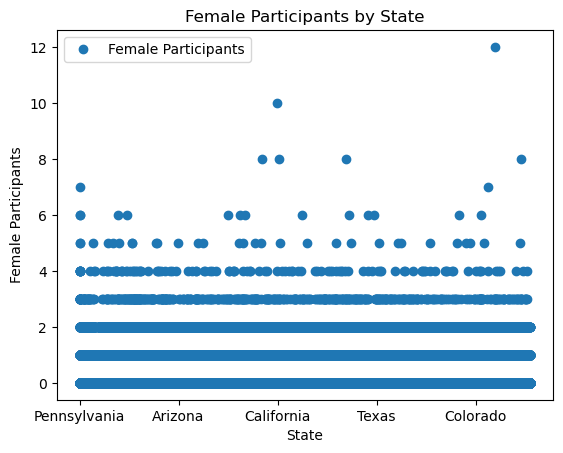

In [17]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 4- Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
"""

gun_vio_regress.plot(x = 'state', y='Female Participants',style='o')
plt.title('Female Participants by State')  
plt.xlabel('State')  
plt.ylabel('Female Participants')  
plt.show()

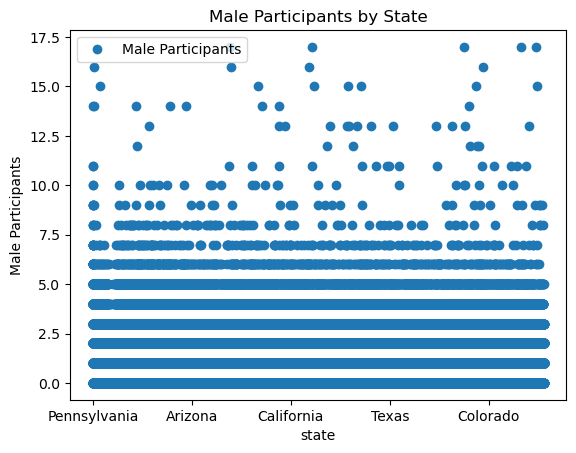

In [18]:
gun_vio_regress.plot(x ='state', y='Male Participants',style='o')
plt.title('Male Participants by State')  
plt.xlabel('state')  
plt.ylabel('Male Participants')  
plt.show()

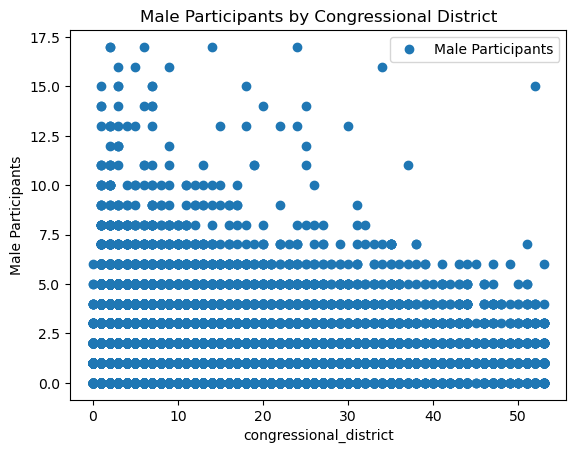

In [19]:
gun_vio_regress.plot(x = 'congressional_district', y='Male Participants',style='o')
plt.title('Male Participants by Congressional District')  
plt.xlabel('congressional_district')  
plt.ylabel('Male Participants')  
plt.show()

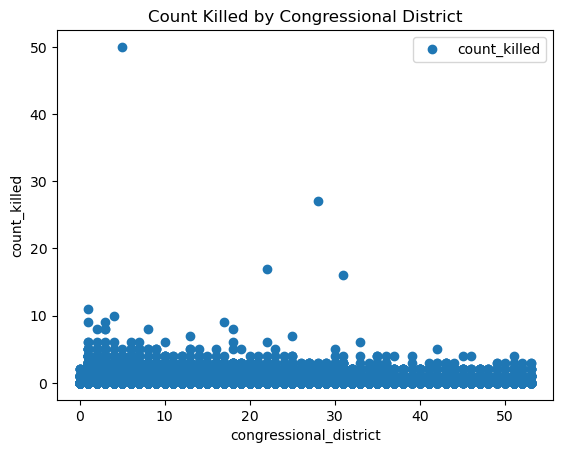

In [20]:
gun_vio_regress.plot(x = 'congressional_district', y='count_killed',style='o')
plt.title('Count Killed by Congressional District')  
plt.xlabel('congressional_district')  
plt.ylabel('count_killed')  
plt.show()

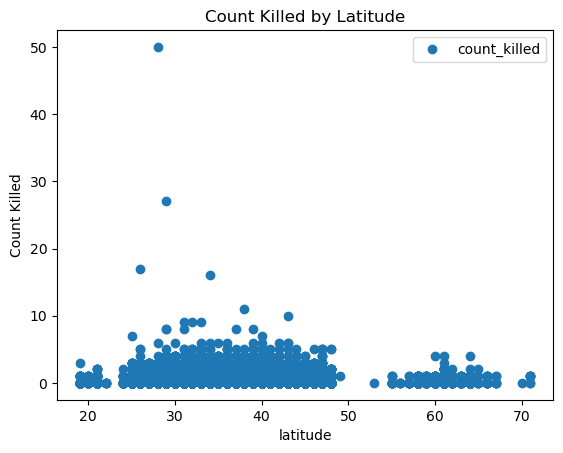

In [22]:
gun_vio_regress.plot(x = 'latitude', y='count_killed',style='o')
plt.title('Count Killed by Latitude')  
plt.xlabel('latitude')  
plt.ylabel('Count Killed')  
plt.show()

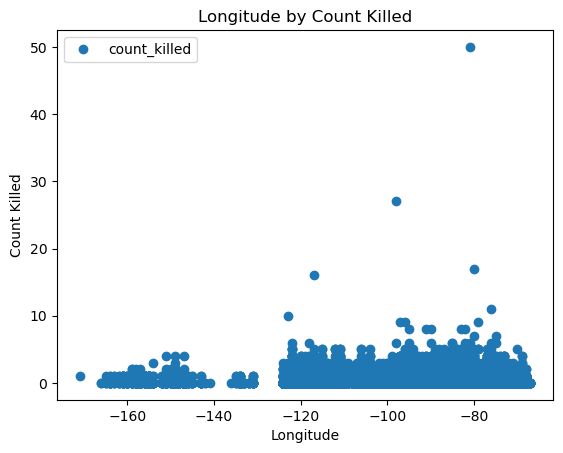

In [23]:
gun_vio_regress.plot(x = 'longitude', y='count_killed',style='o')
plt.title('Longitude by Count Killed')  
plt.xlabel('Longitude')  
plt.ylabel('Count Killed')  
plt.show()

In [26]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 5- State your hypothesis in a markdown cell within your Jupyter notebook.
"""

#Incidents of gun violence have a higher frequency in congressional districts at the latitude -120 thru -80.

'\nFile: gun_vio_clean.csv\nAuthor:Erica Henry\nDate: 04/5/24\n\n#Description: Question 5- State your hypothesis in a markdown cell within your Jupyter notebook.\n'

In [27]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 6- Reshape the variables into NumPy arrays and put them into separate objects.
"""

X = gun_vio_regress['congressional_district'].values.reshape(-1,1)
y = gun_vio_regress['longitude'].values.reshape(-1,1)

In [28]:
X

array([[14],
       [43],
       [ 9],
       ...,
       [ 2],
       [ 9],
       [ 2]], dtype=int64)

In [29]:
y

array([[ -79],
       [-118],
       [ -82],
       ...,
       [ -90],
       [ -95],
       [ -69]])

In [30]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 7- Reshape the variables into NumPy arrays and put them into separate objects.
"""


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 8- Run a linear regression on the data.
              First, fit the model you created to the training set.
              Then, create a prediction for y on the test set.
"""

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
y_predicted = regression.predict(X_test)

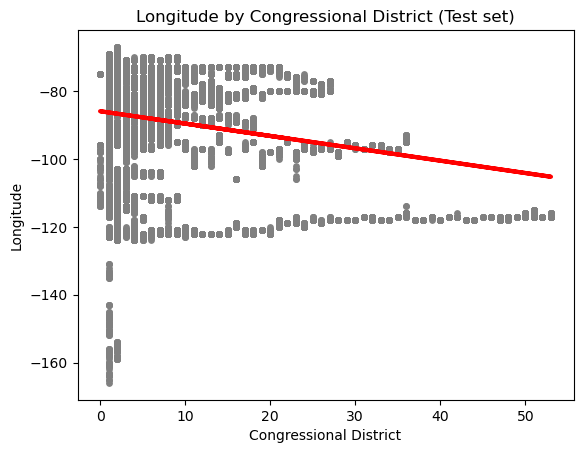

In [34]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 9- Create a plot that shows the regression line on the test set.

"""

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Longitude by Congressional District (Test set)')
plot_test.xlabel('Congressional District')
plot_test.ylabel('Longitude')
plot_test.show()

In [35]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 10- Write your own interpretation of how well the line appears to fit the data in a markdown cell.

"""

#The line doesn't cover all data points, there are many underneath it along the longitude marker -120, which doesn't support my hypothesis.

'\nFile: gun_vio_clean.csv\nAuthor:Erica Henry\nDate: 04/5/24\n\n#Description: Question 10- Write your own interpretation of how well the line appears to fit the data in a markdown cell.\n\n'

In [36]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 11- Check the model performance statistics—MSE and R2 score.

"""

# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.36432984]]
Mean squared error:  194.83974072942735
R2 score:  0.04749066270973279


In [38]:
y_predicted

array([[-88.12999567],
       [-90.68030453],
       [-87.03700616],
       ...,
       [-86.30834649],
       [-89.58731502],
       [-93.95927306]])

In [39]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 12- Create a dataframe comparing the actual and predicted values of y.

"""


data_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_compare.head(30)

,Actual,Predicted
0,-70,-88.129996
1,-77,-90.680305
2,-99,-87.037006
3,-73,-87.401336
4,-79,-91.044634
5,-87,-86.308346
6,-115,-87.401336
7,-84,-86.672676
8,-86,-88.494326
9,-75,-86.672676


In [40]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.36432984]]
Mean squared error:  195.15620960982545
R2 score:  0.046619066382655006


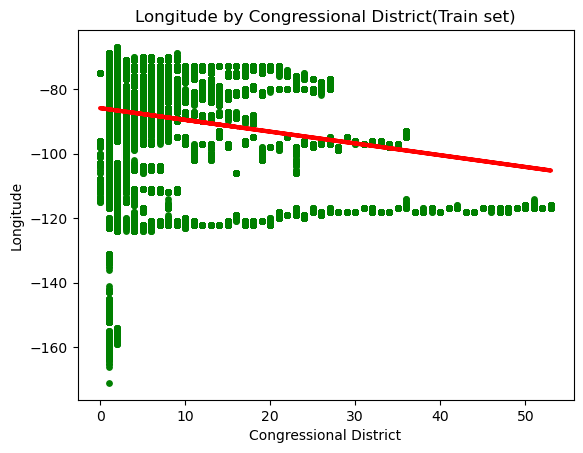

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Longitude by Congressional District(Train set)')
plot_test.xlabel('Congressional District')
plot_test.ylabel('Longitude')
plot_test.show()

In [44]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/5/24

#Description: Question 13- Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

"""

# The slope value of -0.36 indicates a negative relationship.
# MSE of 194.84 is very large. This indicates a regression may not be the best model to represent this data.
# R2 score of 0.0474 also indicates a poor fit.

'\nFile: gun_vio_clean.csv\nAuthor:Erica Henry\nDate: 04/5/24\n\n#Description: Question 13- Include your thoughts on how well the model performed on the test set in a markdown cell.\nInclude any reflections you have on the impact of possible data bias.\n\n'

In [46]:
#Export of subset gun_vio_regress df
gun_vio_regress.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'gun_vio_regress.pkl'))